In [ ]:
#Importing the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

In [ ]:
#Initialising the CNN
classifier = Sequential()

In [ ]:
#Step 1- Convolution
classifier.add(Convolution2D(32, 3, 3, input_shape=(256,256,3), activation='relu'))

In [ ]:
#Step 2- Max Pooling
classifier.add(MaxPooling2D(pool_size=(2,2)))

# Adding second convolutional layer
classifier.add(Convolution2D(32, 3, 3, activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))

# Adding third convolutional layer
classifier.add(Convolution2D(64, 3, 3, activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))


In [ ]:
#Step 3- Flattening
classifier.add(Flatten())

In [ ]:
#Step 4- Full Connection
classifier.add(Dense(128, activation='relu'))
classifier.add(Dense(6, activation='softmax'))

In [ ]:
#Compiling the CNN
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#Fitting the CNN to the images
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip = True
)

val_datagen = ImageDataGenerator(rescale = 1./255)

test_datagen = ImageDataGenerator(rescale=1./255)


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import keras

In [ ]:
train_path = '/content/drive/MyDrive/dataset/Image_To_Recipe/train'
test_path = '/content/drive/MyDrive/dataset/Image_To_Recipe/test'
val_path = '/content/drive/MyDrive/dataset/Image_To_Recipe/val'



val_dataset = val_datagen.flow_from_directory(
    val_path,
    target_size = (256, 256),
    batch_size = 32,
    class_mode = 'categorical'
)

training_set = train_datagen.flow_from_directory(
    train_path,
    target_size = (256, 256),
    batch_size = 32,
    class_mode = 'categorical'
)

test_set = test_datagen.flow_from_directory(
    test_path,
    target_size = (256, 256),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 419 images belonging to 6 classes.
Found 1423 images belonging to 6 classes.
Found 182 images belonging to 6 classes.


In [ ]:
classifier.fit(
    training_set,
    steps_per_epoch = 1423//32,
    epochs = 25,
    validation_data = val_dataset,
    validation_steps = 420//32
)

Epoch 1/25
44/44 [==============================] - 628s 14s/step - loss: 1.7744 - accuracy: 0.2344 - val_loss: 1.7056 - val_accuracy: 0.2740
Epoch 2/25
44/44 [==============================] - 79s 2s/step - loss: 1.6188 - accuracy: 0.3005 - val_loss: 1.5421 - val_accuracy: 0.3413
Epoch 3/25
44/44 [==============================] - 80s 2s/step - loss: 1.5184 - accuracy: 0.3350 - val_loss: 1.6401 - val_accuracy: 0.3173
Epoch 4/25
44/44 [==============================] - 80s 2s/step - loss: 1.4694 - accuracy: 0.3688 - val_loss: 1.4597 - val_accuracy: 0.3726
Epoch 5/25
44/44 [==============================] - 80s 2s/step - loss: 1.4070 - accuracy: 0.4191 - val_loss: 1.4432 - val_accuracy: 0.3774
Epoch 6/25
44/44 [==============================] - 79s 2s/step - loss: 1.3301 - accuracy: 0.4486 - val_loss: 1.4348 - val_accuracy: 0.4159
Epoch 7/25
44/44 [==============================] - 80s 2s/step - loss: 1.2875 - accuracy: 0.4659 - val_loss: 1.3550 - val_accuracy: 0.4567
Epoch 8/25
44/44 [

In [ ]:
class_map = training_set.class_indices
class_map

{'chai': 0,
 'chapati': 1,
 'chole_bhature': 2,
 'fried_rice': 3,
 'momos': 4,
 'pav_bhaji': 5}

In [ ]:
score = classifier.evaluate(test_set)
score

NameError: ignored

In [ ]:
score[1]

0.7692307829856873

In [ ]:
classifier.save("model_inceptionV3.h5")

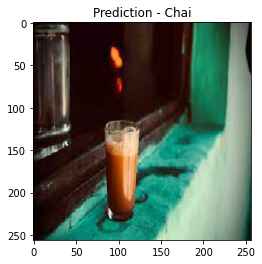

In [ ]:
#Function to Predict single Image
from tensorflow.keras.preprocessing import image
category = {
    0:['chai', 'Chai'],
    1:['chapati','Chapati'],
    2:['chole_bhature', 'Chole Bhature'],
    3:['fried_rice', 'Fried Rice'],
    4:['momos', 'Momos'],
    5:['pav_bhaji', 'Pav Bhaji'
    ] }
filename = '/content/drive/MyDrive/dataset/test/chai/download (10).jpg'
img = image.load_img(filename, target_size=(256,256))
img_array = image.img_to_array(img)
img_processed = np.expand_dims(img_array, axis=0)
img_processed /=255.

prediction = classifier.predict(img_processed)
index = np.argmax(prediction)
plt.title("Prediction - {}".format(category[index][1]))
plt.imshow(img_array)

In [ ]:
#serialize model to json
from keras.models import model_from_json
model_json = classifier.to_json()
with open("classifier.json", "w") as json_file:
  json_file.write(model_json)

In [ ]:
#Serialize weights to HDF5
classifier.save_weights("model.h5")

In [ ]:
# Load Json and create model
json_file = open('classifier.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# load weights into new model
loaded_model.load_weights("model.h5")

In [ ]:
# evaluate loaded model on new image
loaded_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

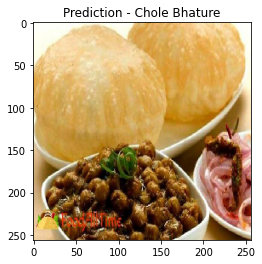

In [ ]:
category = {
    0:['chai', 'Chai'],
    1:['chapati','Chapati'],
    2:['chole_bhature', 'Chole Bhature'],
    3:['fried_rice', 'Fried Rice'],
    4:['momos', 'Momos'],
    5:['pav_bhaji', 'Pav Bhaji'
    ] }
filename = '/content/drive/MyDrive/dataset/val/chole_bhature/013.jpg'
img = image.load_img(filename, target_size=(256,256))
img_array = image.img_to_array(img)
img_processed = np.expand_dims(img_array, axis=0)
img_processed /=255.

prediction = classifier.predict(img_processed)
index = np.argmax(prediction)
plt.title("Prediction - {}".format(category[index][1]))
plt.imshow(img_array)

In [ ]:
#Save the entire model as SavedModel
!mkdir -p save_model
classifier.save('/content/drive/MyDrive/saved_model/my_model')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved_model/my_model/assets


In [ ]:
!ls saved_model

!ls saved_model/my_model

my_model
assets	keras_metadata.pb  saved_model.pb  variables


In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
new_model = tf.keras.models.load_model('/content/drive/MyDrive/saved_model/my_model')
new_model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 85, 85, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 42, 42, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 2, 2, 64)          18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 64)                0

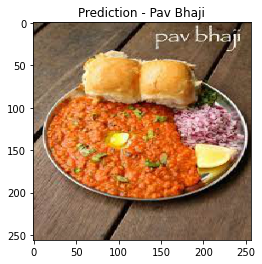

In [ ]:
from tensorflow.keras.preprocessing import image
category = {
    0:['chai', 'Chai'],
    1:['chapati','Chapati'],
    2:['chole_bhature', 'Chole Bhature'],
    3:['fried_rice', 'Fried Rice'],
    4:['momos', 'Momos'],
    5:['pav_bhaji', 'Pav Bhaji']
     }
filename = '/content/download.jfif'
img = image.load_img(filename, target_size=(256,256))
img_array = image.img_to_array(img)
img_processed = np.expand_dims(img_array, axis=0)
img_processed /=255.

prediction = new_model.predict(img_processed)
index = np.argmax(prediction)
plt.title("Prediction - {}".format(category[index][1]))
plt.imshow(img_array)

In [ ]:
import tensorflow as tf
new_model = tf.keras.models.load_model('/content/drive/MyDrive/saved_model/my_model')

In [ ]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 85, 85, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 42, 42, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 2, 2, 64)          18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 64)         0